In [12]:
library(dplyr)
library(ggplot2)
library(grid)
library(gridExtra)
library(reshape2)

In [2]:
trainData = tbl_df(read.csv("../data/train.csv", stringsAsFactors = FALSE))
trainData = trainData %>% select(-Id)

In [3]:
names(trainData)

[1] "MSSubClass"    "MSZoning"      "LotFrontage"   "LotArea"      
 [5] "Street"        "Alley"         "LotShape"      "LandContour"  
 [9] "Utilities"     "LotConfig"     "LandSlope"     "Neighborhood" 
[13] "Condition1"    "Condition2"    "BldgType"      "HouseStyle"   
[17] "OverallQual"   "OverallCond"   "YearBuilt"     "YearRemodAdd" 
[21] "RoofStyle"     "RoofMatl"      "Exterior1st"   "Exterior2nd"  
[25] "MasVnrType"    "MasVnrArea"    "ExterQual"     "ExterCond"    
[29] "Foundation"    "BsmtQual"      "BsmtCond"      "BsmtExposure" 
[33] "BsmtFinType1"  "BsmtFinSF1"    "BsmtFinType2"  "BsmtFinSF2"   
[37] "BsmtUnfSF"     "TotalBsmtSF"   "Heating"       "HeatingQC"    
[41] "CentralAir"    "Electrical"    "X1stFlrSF"     "X2ndFlrSF"    
[45] "LowQualFinSF"  "GrLivArea"     "BsmtFullBath"  "BsmtHalfBath" 
[49] "FullBath"      "HalfBath"      "BedroomAbvGr"  "KitchenAbvGr" 
[53] "KitchenQual"   "TotRmsAbvGrd"  "Functional"    "Fireplaces"   
[57] "FireplaceQu"   "GarageType"    "GarageYrBlt"   "GarageFinish" 
[61] "GarageCars"    "GarageArea"    "GarageQual"    "GarageCond"   
[65] "PavedDrive"    "WoodDeckSF"    "OpenPorchSF"   "EnclosedPorch"
[69] "X3SsnPorch"    "ScreenPorch"   "PoolArea"      "PoolQC"       
[73] "Fence"         "MiscFeature"   "MiscVal"       "MoSold"       
[77] "YrSold"        "SaleType"      "SaleCondition" "SalePrice"

In [4]:
x = trainData %>% filter(is.na(SalePrice))
dim(x)

[1]  0 80

In [5]:
SalePrice = trainData %>% select(SalePrice) %>% na.omit()
SalePrice = SalePrice %>% mutate(LogSalePrice = log(SalePrice + 1))
head(SalePrice, 3)

,SalePrice,LogSalePrice
1,208500,12.2477
2,181500,12.10902
3,223500,12.31717


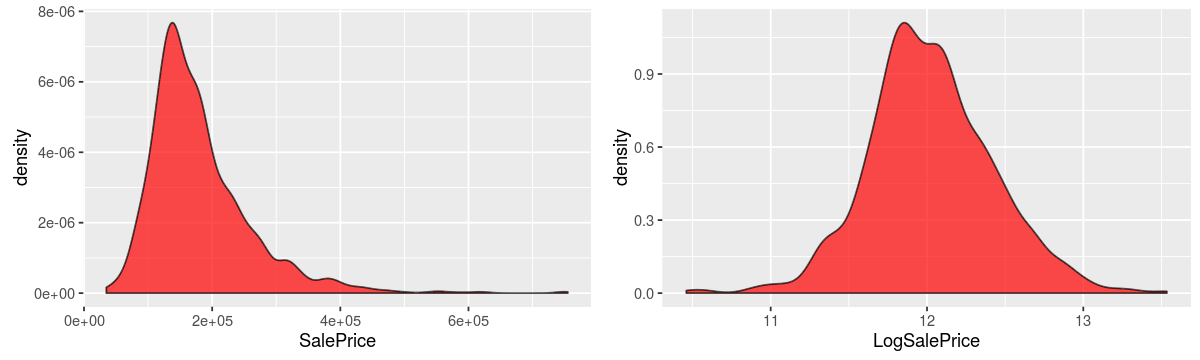

In [6]:
options(repr.plot.width = 10, repr.plot.height = 3)

gSalePrice = ggplot(SalePrice, aes(SalePrice))
gSalePrice = gSalePrice + geom_density(fill = "red", alpha = "0.7")

gLogSalePrice = ggplot(SalePrice, aes(LogSalePrice))
gLogSalePrice = gLogSalePrice + geom_density(fill = "red", alpha = "0.7")

grid.arrange(gSalePrice, gLogSalePrice,
    layout_matrix=rbind(c(1, 2))
)

In [7]:
summary(SalePrice$SalePrice)
summary(SalePrice$LogSalePrice)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  34900  130000  163000  180900  214000  755000 

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  10.46   11.78   12.00   12.02   12.27   13.53 

In [8]:
trainDataNumeric = trainData %>% select_if(is.numeric)
str(trainDataNumeric)

Classes ‘tbl_df’, ‘tbl’ and 'data.frame':	1460 obs. of  37 variables:
 $ MSSubClass   : int  60 20 60 70 60 50 20 60 50 190 ...
 $ LotFrontage  : int  65 80 68 60 84 85 75 NA 51 50 ...
 $ LotArea      : int  8450 9600 11250 9550 14260 14115 10084 10382 6120 7420 ...
 $ OverallQual  : int  7 6 7 7 8 5 8 7 7 5 ...
 $ OverallCond  : int  5 8 5 5 5 5 5 6 5 6 ...
 $ YearBuilt    : int  2003 1976 2001 1915 2000 1993 2004 1973 1931 1939 ...
 $ YearRemodAdd : int  2003 1976 2002 1970 2000 1995 2005 1973 1950 1950 ...
 $ MasVnrArea   : int  196 0 162 0 350 0 186 240 0 0 ...
 $ BsmtFinSF1   : int  706 978 486 216 655 732 1369 859 0 851 ...
 $ BsmtFinSF2   : int  0 0 0 0 0 0 0 32 0 0 ...
 $ BsmtUnfSF    : int  150 284 434 540 490 64 317 216 952 140 ...
 $ TotalBsmtSF  : int  856 1262 920 756 1145 796 1686 1107 952 991 ...
 $ X1stFlrSF    : int  856 1262 920 961 1145 796 1694 1107 1022 1077 ...
 $ X2ndFlrSF    : int  854 0 866 756 1053 566 0 983 752 0 ...
 $ LowQualFinSF : int  0 0 0 0 0 0 0 0 0 0

In [15]:
source('helpers.R')

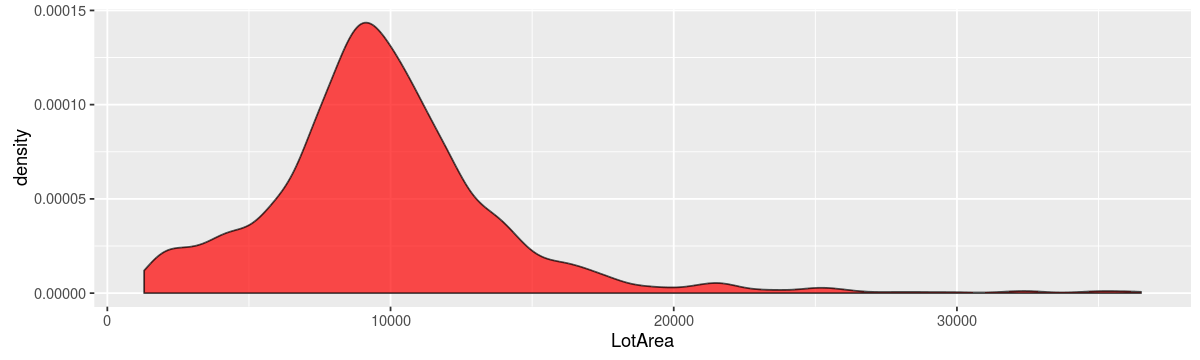

In [16]:
gLotArea = get_covariate_hist(trainDataNumeric, "LotArea")
gLotArea

In [21]:
heterogeneity_score <- function(vector){
    len = length(vector)
    uniq_len = length(unique(vector))
    100 * (uniq_len / len)
}

trainDataHighHeterogeneity = trainDataNumeric %>% select_if(function(x) { heterogeneity_score(x) > 10 })

head(trainDataHighHeterogeneity)

,LotArea,MasVnrArea,BsmtFinSF1,BsmtUnfSF,TotalBsmtSF,X1stFlrSF,X2ndFlrSF,GrLivArea,GarageArea,WoodDeckSF,OpenPorchSF,SalePrice
1,8450,196,706,150,856,856,854,1710,548,0,61,208500
2,9600,0,978,284,1262,1262,0,1262,460,298,0,181500
3,11250,162,486,434,920,920,866,1786,608,0,42,223500
4,9550,0,216,540,756,961,756,1717,642,0,35,140000
5,14260,350,655,490,1145,1145,1053,2198,836,192,84,250000
6,14115,0,732,64,796,796,566,1362,480,40,30,143000
